In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic = pd.read_csv("d:\BaiduNetdiskDownload/titanic_train.csv")
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [65]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [66]:
print(titanic['Sex'].unique())#几种可能性
titanic.loc[titanic['Sex']=='male','Sex'] = 0
titanic.loc[titanic['Sex']=='female','Sex'] = 1

['male' 'female']


['S' 'C' 'Q' nan]


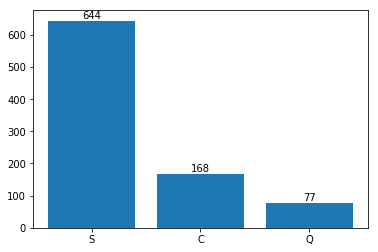

891


In [67]:
print(titanic['Embarked'].unique())
plt.bar(np.arange(len(titanic['Embarked'].value_counts()))+0.5,titanic['Embarked'].value_counts())
plt.xticks(np.arange(len(titanic['Embarked'].value_counts()))+0.5,titanic['Embarked'].value_counts().index)
for x,y in zip(np.arange(len(titanic['Embarked'].value_counts()))+0.5,titanic['Embarked'].value_counts()):
               plt.text(x,y,y,ha="center", va="bottom")
plt.show()
#把最多的填充给空白处
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked']=='S','Embarked'] = 1
titanic.loc[titanic['Embarked']=='C','Embarked'] = 2
titanic.loc[titanic['Embarked']=='Q','Embarked'] = 3
print(len(titanic['Embarked']))

In [68]:
#进行学习
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
predictors = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
x = predictors
print(x.head())
y = titanic['Survived']
#print(predictors.head()),还剩6个特征量
lr = LinearRegression()
kf=KFold(n_splits=3,random_state=1)
kf.get_n_splits(x)#交叉验证的倍数
predictions = []
#for train_index, test_index in kf.split(x):
 #   x_train, x_test = x[train_index], x[test_index]
  #  y_train, y_test = y[train_index], y[test_index]
   # lr.fit(x_train,y_train)
   


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         1
1       1    1  38.0      1      0  71.2833         2
2       3    1  26.0      0      0   7.9250         1
3       1    1  35.0      1      0  53.1000         1
4       3    0  35.0      0      0   8.0500         1


In [69]:
#进行学习
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
predictors = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
x = predictors
y = titanic['Survived']
lr = LinearRegression()
x_tt,x_validation,y_tt,y_validation = train_test_split(x,y,test_size = 0.2)
x_train,x_test,y_train,y_test = train_test_split(x_tt,y_tt,test_size = 0.25)
print(len(x_train),len(x_validation),len(x_test))

534 179 178


In [75]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
features= x
label = y
regr=LinearRegression()
regr=Ridge(alpha=1)
regr=Lasso(alpha=0.001)
regr.fit(features.values,label.values)
y_pred=regr.predict(features.values)
print("Coef:拟合参数",regr.coef_)
from sklearn.metrics import mean_squared_error#判断好坏
print("MSE:",mean_squared_error(y_pred,label.values))

Coef:拟合参数 [-1.73404235e-01  4.99472800e-01 -5.86896720e-03 -4.16160575e-02
 -1.40861513e-02  3.46106921e-04  3.94070202e-02]
MSE: 0.142453316769581


In [76]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver="sag",max_iter=10000)
#可见这个不是单纯的线性可以解决，需要高维解决
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_validation)
print("ACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))

ACC: 0.7877094972067039
REC: 0.6805555555555556
F-Score: 0.7205882352941176


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rfc_clf = RandomForestClassifier(n_estimators=10,min_samples_split=4,\
                                 min_samples_leaf=2,max_features=None)
rfc_clf.fit(x_train,y_train)
y_pred = rfc_clf.predict(x_validation)
print("random forest:\nACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
y_pred = dtc_clf.predict(x_validation)
print("decide tree:\nACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))#在不知道哪个更好的时候就先带入随机森林

random forest:
ACC: 0.8156424581005587
REC: 0.7638888888888888
F-Score: 0.7692307692307692
decide tree:
ACC: 0.7821229050279329
REC: 0.7083333333333334
F-Score: 0.723404255319149


In [91]:
#由于准确率过低，考虑增加特征
import re
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']
titanic['NameLength']=titanic['Name'].apply(lambda x:len(x))

def get_title(name):
     # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Countess      1
Mme           1
Sir           1
Ms            1
Lady          1
Capt          1
Don           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


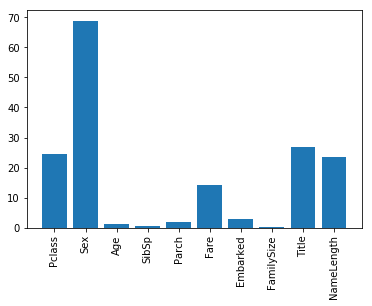

In [96]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif #choose best
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
from sklearn.model_selection import train_test_split
predictors = ["Pclass", "Sex", "Age","Fare",  "FamilySize", "Title", "NameLength"]
x = predictors
y = titanic['Survived']
lr = LinearRegression()
x_tt,x_validation,y_tt,y_validation = train_test_split(x,y,test_size = 0.2)
x_train,x_test,y_train,y_test = train_test_split(x_tt,y_tt,test_size = 0.25)
print(len(x_train),len(x_validation),len(x_test))

ValueError: Found input variables with inconsistent numbers of samples: [7, 891]

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_splits=3, random_state=1)
kf.get_n_splits(titanic.shape[0])
predictions = []
for train, test in kf.split(titanic.shape[0]):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

TypeError: __init__() got multiple values for argument 'n_splits'